## Cameron Roehlk Task for Linear Regression

#### This notebook is saved in Github under isu-abe/516X/croehlk named Roehlk-Task for Linear Regression-Cleaned.ipynb

Here are some recommended packages, not all are required and depends on your solution.

In [2]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

## Questions

You are a consultant for a company that sells widgets.  They have historical data on their sales on their investments in advertising in various media outlets, including TV, radio, and newspapers.  On the basis of this data, how should they be spending their advertising money in the future?

Your analysis should answer the following questions:

Is there a relationship between ads and sales?

How strong is that relationship?

Which ad types contribute to sales?

What is the effect of each ad type of sales?

Given ad spending in a particular market, can sales be predicted?

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


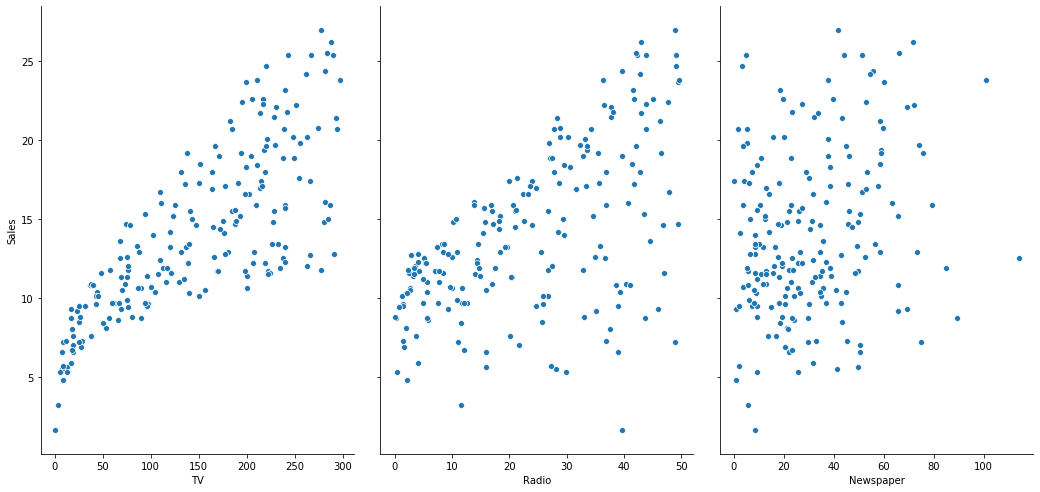

In [3]:
# read data into a DataFrame, this is money spent on different medias
data = pd.read_csv('https://raw.githubusercontent.com/lneisenman/isl/master/data/Advertising.csv', index_col=0)
print(data.head())
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7)


In [4]:
tv = data['TV']
radio = data['Radio']
newspaper = data['Newspaper']
sales = data['Sales']

In [5]:
TVmodel = LinearRegression(fit_intercept=True)
Radiomodel = LinearRegression(fit_intercept=True)
Newspapermodel = LinearRegression(fit_intercept=True)

In [6]:
sales.shape

(200,)

In [7]:
TVdata = tv[:, np.newaxis]
TVdata.shape

(200, 1)

In [8]:
Radiodata = radio[:, np.newaxis]
Radiodata.shape

(200, 1)

In [9]:
Newspaperdata = newspaper[:, np.newaxis]
Newspaperdata.shape

(200, 1)

In [10]:
TVmodel.fit(TVdata,sales) , Radiomodel.fit(Radiodata,sales) , Newspapermodel.fit(Newspaperdata,sales)

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))

In [11]:
TVmodel.coef_ , Radiomodel.coef_ , Newspapermodel.coef_

(array([0.04753664]), array([0.20249578]), array([0.0546931]))

In [12]:
TVmodel.intercept_ , Radiomodel.intercept_ , Newspapermodel.intercept_

(7.032593549127693, 9.311638095158283, 12.35140706927816)

In [13]:
tvfit = np.linspace(-1,301)
radiofit = np.linspace(-1, 51)
newspaperfit = np.linspace(-1, 121)

In [14]:
TVfit = tvfit[:, np.newaxis]
Radiofit = radiofit[:, np.newaxis]
Newspaperfit = newspaperfit[:, np.newaxis]

In [15]:
salestvfit = TVmodel.predict(TVfit)
salesradiofit = Radiomodel.predict(Radiofit)
salesnewsfit = Newspapermodel.predict(Newspaperfit)

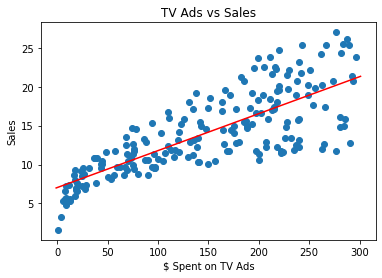

In [16]:
# TV vs Sales
import matplotlib.pyplot as plt
plt.scatter(tv,sales)
plt.plot(tvfit,salestvfit, color='red')
plt.title("TV Ads vs Sales")
plt.xlabel("$ Spent on TV Ads")
plt.ylabel("Sales")
plt.show()

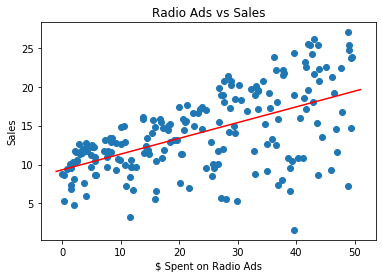

In [17]:
# Radio vs Sales
plt.scatter(radio,sales)
plt.plot(radiofit,salesradiofit, color='red')
plt.title("Radio Ads vs Sales")
plt.xlabel("$ Spent on Radio Ads")
plt.ylabel("Sales")
plt.show()

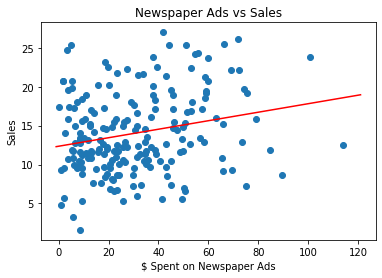

In [18]:
# Newspaper vs Sales
plt.scatter(newspaper,sales)
plt.plot(newspaperfit,salesnewsfit, color='red')
plt.title("Newspaper Ads vs Sales")
plt.xlabel("$ Spent on Newspaper Ads")
plt.ylabel("Sales")
plt.show()

TV advertisements offer the greatest amount of sales based off the slope of the line of best fit. The company should focus on TV advertisements if they want to increase sales.

In the lecture, we covered how to perform a linear regression model.  We did not however explore how "good" this model is.  The task below will have you identifying ways to evaluate a linear regression model.

Machine learning focuses on what the model predicts. If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the Statsmodels Python package. Take some time to look at this [package](https://www.statsmodels.org/stable/regression.html) and also an [example of evaluating a linear regression](https://www.statsmodels.org/stable/examples/notebooks/generated/gls.html).

Similar to Scikit-learn, one can calculate the intercept and coefficient for a linear fit for a set of data.  

In [28]:
overall = smf.ols(formula='sales ~ tv + radio + newspaper', data=data).fit()
overall.params

Intercept    2.938889
tv           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [29]:
print(overall.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.58e-96
Time:                        12:43:20   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [30]:
tv_model = smf.ols(formula='sales ~ tv', data=data).fit()
tv_model.params

Intercept    7.032594
tv           0.047537
dtype: float64

In [31]:
print(tv_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.47e-42
Time:                        12:44:30   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

A confidence interval can be used to describe a linear model.  How would you calculate the confidence interval of this model and what does this confidence interval mean?

In [34]:
tv_model.conf_int(alpha=0.05)

,0,1
Intercept,6.129719,7.935468
tv,0.042231,0.052843


In [36]:
overall.conf_int(alpha=0.05)

,0,1
Intercept,2.323762,3.554016
tv,0.043014,0.048516
radio,0.171547,0.205513
newspaper,-0.012616,0.010541


A confidence interval tells us that we can be certain the range of values contain the true mean of the value. In the example of the TV model, a 95% confidence interval indicates that I can be 95% certain the range of values contain the true mean.

Other metrics that are used to describe the appropriateness of a model is a p-value.  How would you calculate the p-value and r-squared values of the model?  What do these values mean?

In [33]:
tv_model.pvalues

Intercept    1.406300e-35
tv           1.467390e-42
dtype: float64

In [37]:
overall.pvalues

Intercept    1.267295e-17
tv           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64

Looking at the p-value for the TV model, the p-value is less than 5% which indicates these values are significant. So I can reject the null hypothesis.

In [41]:
tv_model.rsquared

0.611875050850071

In [42]:
overall.rsquared

0.8972106381789522

The R squared values measures the proportion of variance in the dependent variable that is predictable from the indenpendent variable. For the overall model, an R squared value of 0.89 shows that 89% of the data fit the regression model.